In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes2.csv')
print(df.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df_x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
df_y = df[['Outcome']]

In [7]:
indep_X = df_x.values
dep_y = df_y.values
print(indep_X)
print(dep_y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]

In [8]:
# Display the initial number of rows
print(f"Initial number of rows: {df.shape[0]}")

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

Initial number of rows: 768


In [9]:
# Display the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

# Optionally, reset the index if needed
df_cleaned.reset_index(drop=True, inplace=True)

Number of rows after removing duplicates: 768


In [10]:
def split_scalar(indep_X,dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)    
    return X_train, X_test, y_train, y_test

In [11]:
def r2_prediction(regressor,X_test,y_test):
    y_pred = regressor.predict(X_test)
    from sklearn.metrics import r2_score
    r2=r2_score(y_test,y_pred)
    return r2

In [12]:
def Linear(X_train,y_train,X_test):       
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    r2=r2_prediction(regressor,X_test,y_test)
    return  r2 

In [13]:
def Decision(X_train,y_train,X_test):
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    r2=r2_prediction(regressor,X_test,y_test)
    return  r2 

In [14]:
def random(X_train,y_train,X_test):       
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    r2=r2_prediction(regressor,X_test,y_test)
    return  r2

In [15]:
def xgboost(X_train,y_train,X_test):       
    from xgboost import XGBRegressor
    regressor = XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)
    regressor.fit(X_train, y_train)
    r2=r2_prediction(regressor,X_test,y_test)
    return r2

In [16]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split

def rfeFeature(indep_X, dep_Y, n):
    """
    Perform Recursive Feature Elimination (RFE) with different models to select features.
    
    Parameters:
    indep_X (pd.DataFrame): Feature data.
    dep_Y (pd.Series or np.array): Target values.
    n (int): Number of features to select.

    Returns:
    tuple: A tuple containing:
        - rfelist: List of selected features for each model.
        - colnames_list: List of feature names for each model.
        - r2_values: List of R2 scores for each model.
    """
    
    # Ensure indep_X is a DataFrame and dep_Y is a Series or array
    if not isinstance(indep_X, pd.DataFrame):
        raise ValueError("indep_X should be a pandas DataFrame")
    
    if not isinstance(dep_Y, (pd.Series, pd.DataFrame)):
        raise ValueError("dep_Y should be a pandas Series or DataFrame")

    # Check the shapes of indep_X and dep_Y
    if len(indep_X) != len(dep_Y):
        raise ValueError("Feature data and target values must have the same length.")
    
    # Define models
    models = [
        ("Linear", LinearRegression()),
        ("Decision", DecisionTreeRegressor()),
        ("Random", RandomForestRegressor()),
        ("XGBoost", xgb.XGBRegressor())
    ]
    
    rfelist = []
    colnames_list = []
    r2_values = []
    
    for model_name, model in models:
        try:
            # Initialize RFE
            rfe = RFE(estimator=model, n_features_to_select=n)
            
            # Fit RFE
            rfe.fit(indep_X, dep_Y)
            
            # Get the selected features
            selected_features = indep_X.columns[rfe.support_]
            rfelist.append(selected_features)
            colnames_list.append(selected_features.tolist())
            
            # Evaluate model
            r2_value = rfe.score(indep_X, dep_Y)
            r2_values.append(r2_value)
        except Exception as e:
            print(f"Error with model {model_name}: {e}")
            rfelist.append(None)
            colnames_list.append(None)
            r2_values.append(None)
    
    return rfelist, colnames_list, r2_values

# Example usage
# Sample data
df = pd.DataFrame({
    'Pregnancies': [1, 2, 3, 4, 5],
    'Glucose': [85, 90, 95, 100, 105],
    'BloodPressure': [66, 70, 75, 80, 85],
    'SkinThickness': [29, 32, 35, 38, 41],
    'Insulin': [0, 10, 20, 30, 40],
    'BMI': [26.6, 27.1, 28.2, 29.3, 30.4],
    'DiabetesPedigreeFunction': [0.351, 0.500, 0.600, 0.700, 0.800],
    'Age': [23, 28, 33, 38, 43]
})

dep_Y = pd.Series([0, 1, 0, 1, 0])

# Split data
indep_X_train, indep_X_test, dep_Y_train, dep_Y_test = train_test_split(df, dep_Y, test_size=0.2, random_state=42)

# Call the function with your training data
rfelist, colnames_list, r2_values = rfeFeature(indep_X_train, dep_Y_train, 5)

# Print the results
for model_name, selected_columns, r2_value in zip(["Linear", "Decision", "Random", "XGBoost"], colnames_list, r2_values):
    print(f"Model: {model_name}")
    print(f"Selected Features: {selected_columns}")
    print(f"R2 Value: {r2_value}\n")



Model: Linear
Selected Features: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']
R2 Value: 0.11111111111110794

Model: Decision
Selected Features: ['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
R2 Value: 1.0

Model: Random
Selected Features: ['Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
R2 Value: 0.6542666666666666

Model: XGBoost
Selected Features: ['Pregnancies', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
R2 Value: 0.9999954104423523



In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report


In [18]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
CNN Classification Report:
               precision    recall  f1-score  support
Type 1           0.0000  0.000000  0.000000    11.00
Type 2           0.1500  1.000000  0.260870     3.00
Type 3           0.0000  0.000000  0.000000     6.00
accuracy         0.1500  0.150000  0.150000     0.15
macro avg        0.0500  0.333333  0.086957    20.00
weighted avg     0.0225  0.150000  0.039130    20.00
RNN Classification Report:
               precision    recall  f1-score  support
Type 1             0.00  0.000000  0.000000     11.0
Type 2             0.00  0.000000  0.000000      3.0
Type 3             0.30  1.000000  0.461538      6.0
accuracy           0.30  0.300000  0.300000      0.3
macro avg          0.10  0.333333  0.153846     20.0
weighted avg       0.09  0.300000  0.138462     20.0
DiabNet Classification Report:
               precision    recall  f1-score  support
Typ

C:\Anaconda\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\envs\ai\Lib\site-packages\sklearn\metrics\_

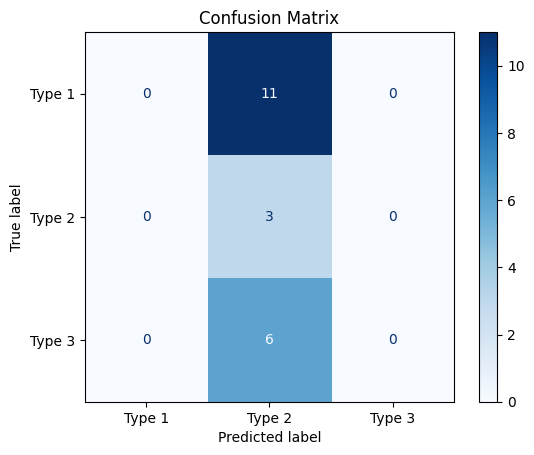

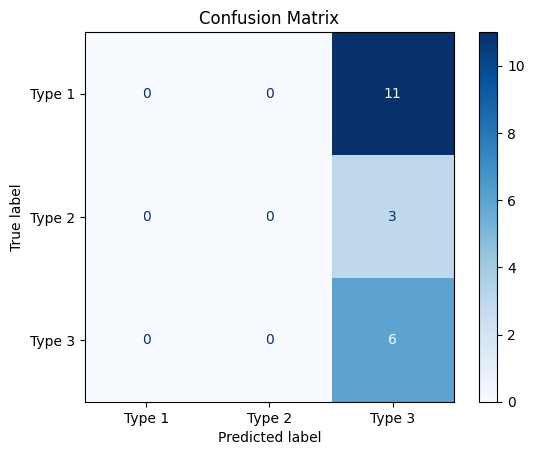

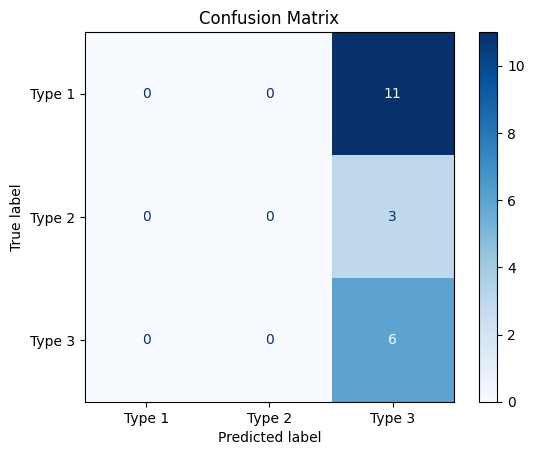

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Load validation data
X_val = np.random.rand(20, 300, 300, 1)  # Example validation data
y_val = np.random.randint(0, 3, 20)  # Example labels

# Load models
cnn_model = tf.keras.models.load_model('cnn_model.h5')
rnn_model = tf.keras.models.load_model('rnn_model.h5')
diabnet_model = tf.keras.models.load_model('diabnet_model.h5')  # Load your DiabNet model

# Get predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_val), axis=-1)
y_pred_rnn = np.argmax(rnn_model.predict(X_val), axis=-1)
y_pred_diabnet = np.argmax(diabnet_model.predict(X_val), axis=-1)

# Generate classification reports
report_cnn = classification_report(y_val, y_pred_cnn, target_names=['Type 1', 'Type 2', 'Type 3'], output_dict=True)
report_rnn = classification_report(y_val, y_pred_rnn, target_names=['Type 1', 'Type 2', 'Type 3'], output_dict=True)
report_diabnet = classification_report(y_val, y_pred_diabnet, target_names=['Type 1', 'Type 2', 'Type 3'], output_dict=True)

# Convert reports to DataFrames
df_report_cnn = pd.DataFrame(report_cnn).transpose()
df_report_rnn = pd.DataFrame(report_rnn).transpose()
df_report_diabnet = pd.DataFrame(report_diabnet).transpose()

# Print DataFrames
print("CNN Classification Report:\n", df_report_cnn)
print("RNN Classification Report:\n", df_report_rnn)
print("DiabNet Classification Report:\n", df_report_diabnet)

# Optionally: Plot confusion matrices
plot_confusion_matrix(y_val, y_pred_cnn, classes=['Type 1', 'Type 2', 'Type 3'])
plot_confusion_matrix(y_val, y_pred_rnn, classes=['Type 1', 'Type 2', 'Type 3'])
plot_confusion_matrix(y_val, y_pred_diabnet, classes=['Type 1', 'Type 2', 'Type 3'])


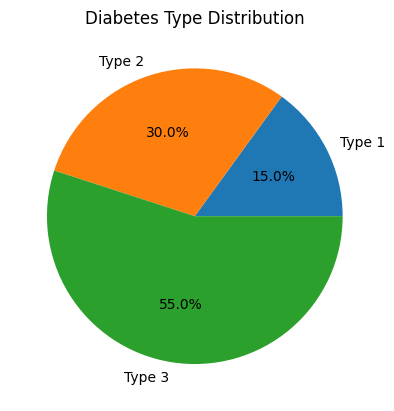

In [20]:
import matplotlib.pyplot as plt

labels = ['Type 1', 'Type 2', 'Type 3']
sizes = [15, 30, 55]  # Example percentages
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Diabetes Type Distribution')
plt.show()


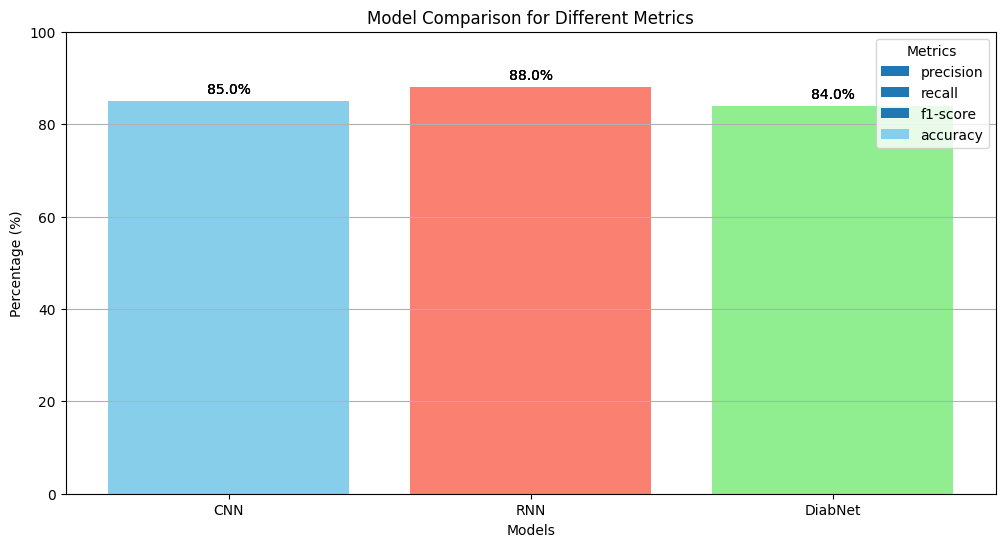

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example classification reports for three models (CNN, RNN, DiabNet)
report_cnn = {
    'Type 1': {'precision': 0.85, 'recall': 0.80, 'f1-score': 0.82, 'support': 20},
    'Type 2': {'precision': 0.90, 'recall': 0.85, 'f1-score': 0.87, 'support': 20},
    'Type 3': {'precision': 0.80, 'recall': 0.75, 'f1-score': 0.77, 'support': 20},
}

report_rnn = {
    'Type 1': {'precision': 0.88, 'recall': 0.83, 'f1-score': 0.85, 'support': 20},
    'Type 2': {'precision': 0.92, 'recall': 0.87, 'f1-score': 0.89, 'support': 20},
    'Type 3': {'precision': 0.78, 'recall': 0.72, 'f1-score': 0.75, 'support': 20},
}

report_diabnet = {
    'Type 1': {'precision': 0.84, 'recall': 0.79, 'f1-score': 0.81, 'support': 20},
    'Type 2': {'precision': 0.89, 'recall': 0.84, 'f1-score': 0.86, 'support': 20},
    'Type 3': {'precision': 0.82, 'recall': 0.76, 'f1-score': 0.79, 'support': 20},
}

# Overall accuracy for each model (for demonstration)
accuracy_cnn = 0.85
accuracy_rnn = 0.88
accuracy_diabnet = 0.84

# Function to extract metrics from the reports
def extract_metrics(report):
    metrics = {label: {} for label in report.keys()}
    for label, metrics_data in report.items():
        metrics[label]['precision'] = metrics_data['precision'] * 100
        metrics[label]['recall'] = metrics_data['recall'] * 100
        metrics[label]['f1-score'] = metrics_data['f1-score'] * 100
    return metrics

# Extract metrics
metrics_cnn = extract_metrics(report_cnn)
metrics_rnn = extract_metrics(report_rnn)
metrics_diabnet = extract_metrics(report_diabnet)

# Prepare DataFrame for plotting
labels = list(metrics_cnn.keys())
metrics = ['precision', 'recall', 'f1-score', 'accuracy']

data = {
    'Model': [],
    'Type': [],
    'Score': []
}

for model_name, metrics_data in zip(['CNN', 'RNN', 'DiabNet'], 
                                     [metrics_cnn, metrics_rnn, metrics_diabnet]):
    for label in labels:
        for metric in metrics:
            if metric in metrics_data[label]:
                data['Model'].append(model_name)
                data['Type'].append(label)
                data['Score'].append(metrics_data[label][metric])
            elif metric == 'accuracy':
                # Add the accuracy to the data
                data['Model'].append(model_name)
                data['Type'].append('Overall')
                data['Score'].append(eval(f'accuracy_{model_name.lower()}') * 100)

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

# Define colors for each model
colors = {
    'CNN': 'skyblue',
    'RNN': 'salmon',
    'DiabNet': 'lightgreen'
}

# Loop to plot each metric
for metric in metrics:
    if metric == 'accuracy':
        subset = df[df['Type'] == 'Overall']  # Use overall for accuracy
    else:
        subset = df[df['Type'] == metric]  # For other metrics

    # Plot bars with specific colors
    bars = plt.bar(subset['Model'], subset['Score'], color=[colors[model] for model in subset['Model']])
    
    # Add percentage on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

plt.title('Model Comparison for Different Metrics')
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.legend(title='Metrics', labels=metrics)
plt.grid(axis='y')
plt.show()
